<a href="https://colab.research.google.com/github/larissacybyk/machine-learning/blob/main/CS_4774_Codeathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codeathon 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, You are in charge of building a system to predict housing prices in Ames, Iowa. You need to find the best model given the Iowa Housing dataset, and then see if you can improve its performance further by tuning its hyperparameters.  You must evaluate your model using RMSE with 5-fold cross-validation. You can use Python’s Scikit-Learn API and Google Colab to present your solution and performance to your peers.

* **DOWNLOAD**: Download from Kaggle the Iowa Housing datasetLinks to an external site. in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace.

* **CODE**: Using this provided template, apply the 8 main steps of an ML project on the selected data set. Write code in a Google Colab, download as a .ipynb file and submit via GradeScope before the deadline. For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

* **PRESENT** (Optional): In a later class meeting, give a lightning talk to pitch your solution in 3-5 minutes. Prepare a presentation (in Google Slides) and email me the URL to be considered (3-5 submissions will be selected to present). You will earn 10 bonus points if you are not already one of the top 10 submissions.

**BONUS POINTS:** 10 bonus points will be given (as Extra credits) for those who score among the top-10 leaderboard while following strictly the assignment guidelines. Best of luck to all!

**IMPORTANT**: You must name your submission yourUVAID_codeathon_1.ipynb








## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

The task is to perform regression on the data and create a model that can predict the housing prices in Ames, IA. It is expected that the model will provide an estimated sale price for a house given a set of attributes. The model, once trained, can be use by inputting a set of attributes for a house in order to get the estimated price. This model has benefits such as allowing you to accurately estimate the price of a house from the attributes, seeing which attributes affect the price the most, and judge if a house is priced correctly or not. The performance measure is a 5-fold cross-validation root mean squared error. On kaggle, there is a training set with data for 1460 different houses. The learning algorithms that are to be used are linear regression, a decision tree regression, and a random forest regressor. Effort will be spent cleaning and preparing the data. It is assumed that the data retrieved from Kaggle is representative of all of Ames, IA and has been gathered in an unbiased way.

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [83]:
import sklearn # general ml package

# Common imports
import numpy as np 
import os 

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [84]:
import pandas as pd

# To help you get started, a load function is provided below.
# You will need to fill in the code under #TODO to make it work.
def loadBostonHousingData(housing_path):
  # The column names are adopted from the dataset page on Kaggle
  return pd.read_csv(housing_path)
  

housing = loadBostonHousingData('./train.csv')

# showing data
housing.info() # several categorical attributes
housing.head()
print(housing["SaleCondition"].value_counts())
housing.describe() 
housing.isnull() # lots of null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

<Figure size 10000x10000 with 0 Axes>

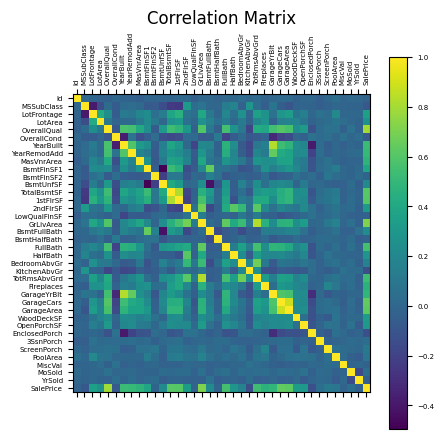

In [85]:
# Your code to visualize the data here
correlation = housing.corr(numeric_only=True)
correlation.shape

correlation["SalePrice"].sort_values(ascending=False)

corr = plt.figure(figsize=(100, 100))
plt.matshow(housing.corr(numeric_only=True))

plt.xticks(range(housing.select_dtypes(['number']).shape[1]), housing.select_dtypes(['number']).columns, fontsize=5, rotation=90)
plt.yticks(range(housing.select_dtypes(['number']).shape[1]), housing.select_dtypes(['number']).columns, fontsize=5)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=5)

plt.title('Correlation Matrix')
plt.show()


In [92]:
from pandas.plotting import scatter_matrix

attributes = housing.columns

# scatter_matrix(housing[attributes], figsize=(12,8))



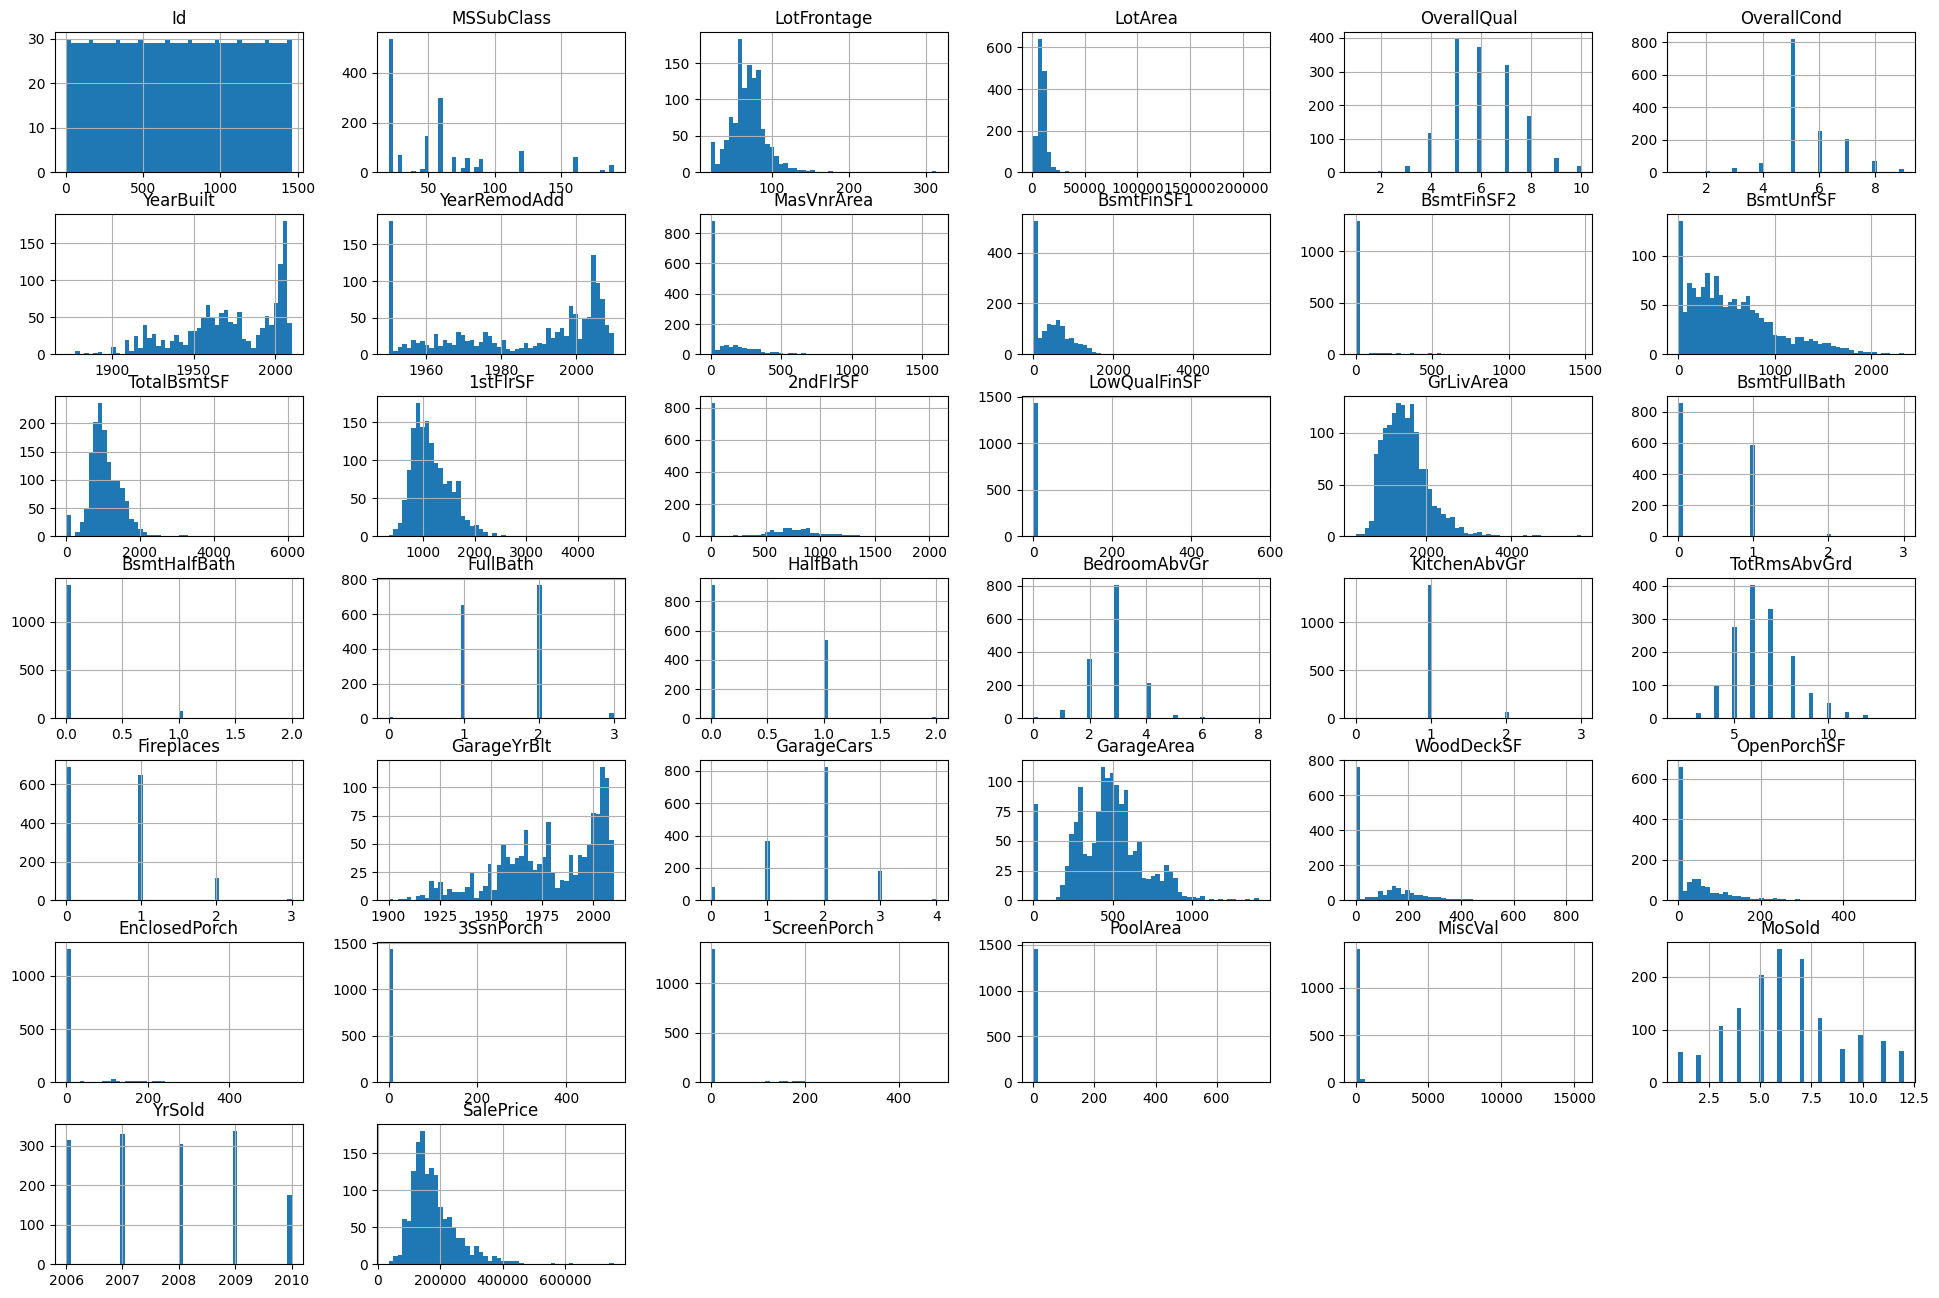

In [39]:
housing.hist(bins=50, figsize=(24,16))
plt.show()

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class.

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [112]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [87]:
# splitting sets
# temp_set, test_set = train_test_split(housing)
# train_set, validation_set = train_test_split(temp_set)

housing_tr = housing.copy()
housing_tr.head()
housing = housing_tr.drop("SalePrice", axis=1)
housing_labels = housing_tr["SalePrice"].copy()



In [129]:
x_temp, x_test, y_temp, y_test = train_test_split(housing, housing_labels, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.1)

# pipeline for number attributes
imputer = SimpleImputer(strategy="median")
std_scaler = StandardScaler()

num_pipeline = Pipeline([
    ("imputer", imputer),
    ("std_scaler", std_scaler)
])
num_col = housing.select_dtypes(['number']).columns

# encoding categorical attributes
cat_encoder = OneHotEncoder(handle_unknown="ignore")
cat_col = housing.select_dtypes(['object']).columns

# full pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_col),
    ("cat", cat_encoder, cat_col)
])



In [130]:
housing_prepared = full_pipeline.fit_transform(x_train)
validation = full_pipeline.transform(x_val)

## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

def calculate_rmse(predictions, y):
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    return rmse

def calculate_cross(reg, val, y_val):
    scores = cross_val_score(reg, val, y_val, scoring="neg_mean_squared_error", cv=5)
    final_scores = np.sqrt(-scores)
    return final_scores


In [132]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, y_train)

lin_pred = lin_reg.predict(housing_prepared)

lin_rmse = calculate_rmse(lin_pred, y_train)
display_scores(lin_rmse)

lin_scores = calculate_cross(lin_reg, validation, y_val)
display_scores(lin_scores)

Scores: 20350.87333419094
Mean: 20350.87333419094
Standard deviation: 0.0
Scores: [32897.13550758 36929.665486   38651.58575385 39015.00905045
 33882.21239692]
Mean: 36275.12163896294
Standard deviation: 2478.701164283482


In [133]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, y_train)

tree_pred = tree_reg.predict(housing_prepared)

tree_rmse = calculate_rmse(tree_pred, y_train)
display_scores(tree_rmse)

tree_scores = calculate_cross(tree_reg, validation, y_val)
display_scores(tree_scores)

Scores: 0.0
Mean: 0.0
Standard deviation: 0.0
Scores: [52539.19310805 66370.10792518 69954.81626214 78471.17794476
 31463.3134961 ]
Mean: 59759.72174724446
Standard deviation: 16435.19701351691


In [134]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, y_train)

forest_pred = forest_reg.predict(housing_prepared)

forest_rmse = calculate_rmse(forest_pred, y_train)
display_scores(forest_rmse)

forest_scores = calculate_cross(forest_reg, validation, y_val)
display_scores(forest_scores)

Scores: 11783.004351100624
Mean: 11783.004351100624
Standard deviation: 0.0
Scores: [25368.16877262 51661.04506688 45110.71578391 24382.52235861
 23253.61744714]
Mean: 33955.21388583015
Standard deviation: 11981.98325485497


## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [135]:
# from colab 3

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [136]:
grid_search.best_params_
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [137]:
cvres = grid_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48784.848556572884 {'max_features': 2, 'n_estimators': 3}
42784.1550146654 {'max_features': 2, 'n_estimators': 10}
39688.99363777952 {'max_features': 2, 'n_estimators': 30}
47123.10203357567 {'max_features': 4, 'n_estimators': 3}
39909.3066293336 {'max_features': 4, 'n_estimators': 10}
37745.01247413258 {'max_features': 4, 'n_estimators': 30}
45563.222883740156 {'max_features': 6, 'n_estimators': 3}
35805.490930603904 {'max_features': 6, 'n_estimators': 10}
34978.85290536892 {'max_features': 6, 'n_estimators': 30}
44626.98778122607 {'max_features': 8, 'n_estimators': 3}
37112.03137327873 {'max_features': 8, 'n_estimators': 10}
34993.86711831024 {'max_features': 8, 'n_estimators': 30}
48766.48195716374 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
40973.59618616851 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
42306.800569863684 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
38566.46276933643 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [140]:
# FINAL MODEL

final_model = grid_search.best_estimator_
final_prepared = full_pipeline.transform(x_test)
final_predictions = final_model.predict(final_prepared)

final_rmse = calculate_rmse(final_predictions, y_test)
display_scores(final_rmse)

Scores: 26816.65389535895
Mean: 26816.65389535895
Standard deviation: 0.0


In [141]:
final_rmse

26816.65389535895

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

A machine learning model was made to address the issue of predicting sale prices of houses in Ames, IA that reflect the housing market in this area. This model is able to predict the housing prices within roughly $26,000 using the random forest regressor machine learning algorithm with the best hyperparameters. To improve the solution, a larger dataset could be collected for training purposes, as well as more robust data with fewer missing attributes.

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!